## Обработка данных радарных пиков

### Чтение данных

In [154]:
import pandas as pd
import re
import sys

In [42]:
def read_single_file(name: str) -> pd.DataFrame:
    return pd.read_csv(name, skiprows=1, skipinitialspace=True, sep='         ', header=None, names=['traceno', 't'], engine='python')

In [45]:
df = read_single_file('pick_68_sum11_end.txt')

/var/folders/y0/_sg1nm_s015bvyw2yhyxttd80000gn/T/ipykernel_48412/410742632.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(name, skiprows=1, skipinitialspace=True, sep='         ', header=None, names=['traceno', 't'])


In [47]:
df

,traceno,t
0,1,124.079
1,2,124.079
2,3,124.079
3,4,124.079
4,5,124.079
...,...,...
2825,2826,199.308
2826,2827,199.308
2827,2828,198.331
2828,2829,198.331


### Обработка данных

In [20]:
mypath = 'picks_2022'

In [21]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [182]:
class pickData():
    def __init__(self, path, name):
        self.name = name
        self.path = path
        self.data = read_single_file(join(path, self.name))
        
        pattern = r'pick_(\d+)_([a-zA-Z]+)(\d+)_(\w+)\.txt'
        # print(name)
        match = re.match(pattern, name)
        # print 
        self.pick_num = int(match.groups()[0])
        self.year = int(match.groups()[2])
        self.comment = match.groups()[3]

    
    def __str__(self):
        return self.name


    def __repr__(self):
        return f'\n{self.name = }\n{self.year = }\n{self.comment = }\n{self.pick_num = }\n'
        

In [183]:
pick_list = []

In [184]:
for file in onlyfiles:
    pick = pickData(mypath, file)
    pick_list.append(pick)

In [185]:
# pick_list.append(pickData(mypath, onlyfiles[5]))

In [186]:
pick_list

[
 self.name = 'pick_59_sum15_beg.txt'
 self.year = 15
 self.comment = 'beg'
 self.pick_num = 59,
 
 self.name = 'pick_71_sum11_end.txt'
 self.year = 11
 self.comment = 'end'
 self.pick_num = 71,
 
 self.name = 'pick_84_sum14_end.txt'
 self.year = 14
 self.comment = 'end'
 self.pick_num = 84,
 
 self.name = 'pick_63_sum14_beg.txt'
 self.year = 14
 self.comment = 'beg'
 self.pick_num = 63,
 
 self.name = 'pick_74_sum14_beg.txt'
 self.year = 14
 self.comment = 'beg'
 self.pick_num = 74,
 
 self.name = 'pick_66_sum11_end.txt'
 self.year = 11
 self.comment = 'end'
 self.pick_num = 66,
 
 self.name = 'pick_68_sum13_beg.txt'
 self.year = 13
 self.comment = 'beg'
 self.pick_num = 68,
 
 self.name = 'pick_62_sum11_end.txt'
 self.year = 11
 self.comment = 'end'
 self.pick_num = 62,
 
 self.name = 'pick_70_sum14_beg.txt'
 self.year = 14
 self.comment = 'beg'
 self.pick_num = 70,
 
 self.name = 'pick_67_sum14_beg.txt'
 self.year = 14
 self.comment = 'beg'
 self.pick_num = 67,
 
 self.name = 'pick

In [217]:
season_list = {}

In [218]:
hash(DataKey(10, 'ffff'))

3644769071708137620

In [244]:
from dataclasses import dataclass

@dataclass(frozen=True)
class DataKey:
    """Class for keeping track of an item in inventory."""
    year: int
    comment: str

In [245]:
data = pd.DataFrame(columns = ['year', 'comment', 'pick_num', 'traceno', 't', 'data_key', 'filename'])

In [246]:
data

,year,comment,pick_num,traceno,t,data_key,filename


In [247]:
for pick in pick_list:
    dk = DataKey(pick.year, pick.comment)
    if dk in data.data_key.to_list() and pick.pick_num in data[data.data_key==dk].pick_num.to_list():
        print(f'Пик номер {pick.pick_num} уже добавлен в таблицу с данными за {pick.year} год ({pick.comment}). '
              'Пик повторно добавлен не будет.', 
              file=sys.stderr)
    else:
        temp = pick.data.copy(deep=False)
        temp['year'] = pick.year
        temp['comment'] = pick.comment
        temp['pick_num'] = pick.pick_num
        temp['data_key'] = dk
        temp['filename'] = pick.name
        data = pd.concat([data, temp])


In [248]:
data

,year,comment,pick_num,traceno,t,data_key,filename
0,15,beg,59,1,48.850,"DataKey(year=15, comment='beg')",pick_59_sum15_beg.txt
1,15,beg,59,2,48.850,"DataKey(year=15, comment='beg')",pick_59_sum15_beg.txt
2,15,beg,59,3,48.850,"DataKey(year=15, comment='beg')",pick_59_sum15_beg.txt
3,15,beg,59,4,49.827,"DataKey(year=15, comment='beg')",pick_59_sum15_beg.txt
4,15,beg,59,5,49.827,"DataKey(year=15, comment='beg')",pick_59_sum15_beg.txt
...,...,...,...,...,...,...,...
545,14,beg,81,546,161.205,"DataKey(year=14, comment='beg')",pick_81_sum14_beg.txt
546,14,beg,81,547,161.205,"DataKey(year=14, comment='beg')",pick_81_sum14_beg.txt
547,14,beg,81,548,161.205,"DataKey(year=14, comment='beg')",pick_81_sum14_beg.txt
548,14,beg,81,549,161.205,"DataKey(year=14, comment='beg')",pick_81_sum14_beg.txt


### Обработка

#### Введите названия двух периодов для сравенения

In [274]:
def timeToDist(t):
    return t*0.106995035

In [281]:
def distToAcc(m):
    return m*511.02 - 338.38

In [328]:
def makemydir(whatever):
    try:
        os.makedirs(whatever)
    except OSError:
        pass

In [257]:
set(data.data_key.to_list())

{DataKey(year=11, comment='end'),
 DataKey(year=12, comment='beg'),
 DataKey(year=12, comment='end'),
 DataKey(year=13, comment='beg'),
 DataKey(year=13, comment='end'),
 DataKey(year=13, comment='ens'),
 DataKey(year=14, comment='beg'),
 DataKey(year=14, comment='end'),
 DataKey(year=15, comment='beg'),
 DataKey(year=15, comment='end'),
 DataKey(year=16, comment='beg')}

In [258]:
first = DataKey(year = 11, comment = 'end')
second = DataKey(year = 12, comment = 'beg')

In [332]:
def calcRelativeAccumulation(first, second, data, path_excel=None):
    suff_first, suff_second = f'_{first.year}_{first.comment}', f'_{second.year}_{second.comment}'
                                             
    res = data[data.data_key == first].merge(data[data.data_key == second],
                                             on=['pick_num', 'traceno'],
                                             how='outer',
                                             suffixes=(suff_first, suff_second),
                                             validate='one_to_one')
    
    res[f'm{suff_first}'] = res[f't{suff_first}'].map(timeToDist)
    res[f'm{suff_second}'] = res[f't{suff_second}'].map(timeToDist)

    res[f'acc{suff_first}'] = res[f'm{suff_first}'].map(distToAcc)
    res[f'acc{suff_second}'] = res[f'm{suff_second}'].map(distToAcc)

    res[f'm_diff{suff_first}{suff_second}'] = res[f'm{suff_second}']-res[f'm{suff_first}']
    res[f'acc_diff{suff_first}{suff_second}'] = res[f'acc{suff_second}']-res[f'acc{suff_first}']

    if path_excel:
        path_excel = path_excel or ''
        
        makemydir(path_excel)
        
        filename = f'result{suff_first}{suff_second}.xlsx'
        print(join(path_excel, filename))
        res.to_excel(join(path_excel, filename), index=False)
    
    return res

In [333]:
res = calcRelativeAccumulation(first, second, data, path_excel='RRR')

/var/folders/y0/_sg1nm_s015bvyw2yhyxttd80000gn/T/ipykernel_49414/4256131664.py:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  res = data[data.data_key == first].merge(data[data.data_key == second],
/var/folders/y0/_sg1nm_s015bvyw2yhyxttd80000gn/T/ipykernel_49414/4256131664.py:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  res = data[data.data_key == first].merge(data[data.data_key == second],


RRR/result_11_end_12_beg.xlsx


In [326]:
res

,year_11_end,comment_11_end,pick_num,traceno,t_11_end,data_key_11_end,filename_11_end,year_12_beg,comment_12_beg,t_12_beg,data_key_12_beg,filename_12_beg,m_11_end,m_12_beg,acc_11_end,acc_12_beg,m_diff_11_end_12_beg,acc_diff_11_end_12_beg
0,11,end,71.0,1.0,189.538,"DataKey(year=11, comment='end')",pick_71_sum11_end.txt,12,beg,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt,20.279625,19.234283,10024.913939,9490.723530,-1.045341,-534.190409
1,11,end,71.0,2.0,189.538,"DataKey(year=11, comment='end')",pick_71_sum11_end.txt,12,beg,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt,20.279625,19.234283,10024.913939,9490.723530,-1.045341,-534.190409
2,11,end,71.0,3.0,189.538,"DataKey(year=11, comment='end')",pick_71_sum11_end.txt,12,beg,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt,20.279625,19.234283,10024.913939,9490.723530,-1.045341,-534.190409
3,11,end,71.0,4.0,189.538,"DataKey(year=11, comment='end')",pick_71_sum11_end.txt,12,beg,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt,20.279625,19.234283,10024.913939,9490.723530,-1.045341,-534.190409
4,11,end,71.0,5.0,189.538,"DataKey(year=11, comment='end')",pick_71_sum11_end.txt,12,beg,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt,20.279625,19.234283,10024.913939,9490.723530,-1.045341,-534.190409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35493,NaN,NaN,74,1450,NaN,NaN,NaN,12,beg,108.447,"DataKey(year=12, comment='beg')",pick_74_sum12_beg.txt,NaN,11.603291,NaN,5591.133542,NaN,NaN
35494,NaN,NaN,74,1451,NaN,NaN,NaN,12,beg,109.424,"DataKey(year=12, comment='beg')",pick_74_sum12_beg.txt,NaN,11.707825,NaN,5644.552583,NaN,NaN
35495,NaN,NaN,74,1452,NaN,NaN,NaN,12,beg,109.424,"DataKey(year=12, comment='beg')",pick_74_sum12_beg.txt,NaN,11.707825,NaN,5644.552583,NaN,NaN
35496,NaN,NaN,74,1453,NaN,NaN,NaN,12,beg,109.424,"DataKey(year=12, comment='beg')",pick_74_sum12_beg.txt,NaN,11.707825,NaN,5644.552583,NaN,NaN


In [295]:
data[(data.data_key==second) &(data.pick_num==71)]

,year,comment,pick_num,traceno,t,data_key,filename
0,12,beg,71,1,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt
1,12,beg,71,2,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt
2,12,beg,71,3,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt
3,12,beg,71,4,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt
4,12,beg,71,5,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt
...,...,...,...,...,...,...,...
1939,12,beg,71,1940,144.596,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt
1940,12,beg,71,1941,144.596,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt
1941,12,beg,71,1942,144.596,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt
1942,12,beg,71,1943,144.596,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt


In [301]:
res

,year_11_end,comment_11_end,pick_num,traceno,t_11_end,data_key_11_end,filename_11_end,year_12_beg,comment_12_beg,t_12_beg,data_key_12_beg,filename_12_beg,m_11_end,m_12_beg,acc_11_end,acc_12_beg,m_diff_11_end_12_beg,acc_diff_11_end_12_beg
0,11,end,71.0,1.0,189.538,"DataKey(year=11, comment='end')",pick_71_sum11_end.txt,12,beg,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt,20.279625,19.234283,10024.913939,9490.723530,-1.045341,-534.190409
1,11,end,71.0,2.0,189.538,"DataKey(year=11, comment='end')",pick_71_sum11_end.txt,12,beg,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt,20.279625,19.234283,10024.913939,9490.723530,-1.045341,-534.190409
2,11,end,71.0,3.0,189.538,"DataKey(year=11, comment='end')",pick_71_sum11_end.txt,12,beg,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt,20.279625,19.234283,10024.913939,9490.723530,-1.045341,-534.190409
3,11,end,71.0,4.0,189.538,"DataKey(year=11, comment='end')",pick_71_sum11_end.txt,12,beg,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt,20.279625,19.234283,10024.913939,9490.723530,-1.045341,-534.190409
4,11,end,71.0,5.0,189.538,"DataKey(year=11, comment='end')",pick_71_sum11_end.txt,12,beg,179.768,"DataKey(year=12, comment='beg')",pick_71_sum12_beg.txt,20.279625,19.234283,10024.913939,9490.723530,-1.045341,-534.190409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35493,NaN,NaN,74,1450,NaN,NaN,NaN,12,beg,108.447,"DataKey(year=12, comment='beg')",pick_74_sum12_beg.txt,NaN,11.603291,NaN,5591.133542,NaN,NaN
35494,NaN,NaN,74,1451,NaN,NaN,NaN,12,beg,109.424,"DataKey(year=12, comment='beg')",pick_74_sum12_beg.txt,NaN,11.707825,NaN,5644.552583,NaN,NaN
35495,NaN,NaN,74,1452,NaN,NaN,NaN,12,beg,109.424,"DataKey(year=12, comment='beg')",pick_74_sum12_beg.txt,NaN,11.707825,NaN,5644.552583,NaN,NaN
35496,NaN,NaN,74,1453,NaN,NaN,NaN,12,beg,109.424,"DataKey(year=12, comment='beg')",pick_74_sum12_beg.txt,NaN,11.707825,NaN,5644.552583,NaN,NaN


<Axes: >

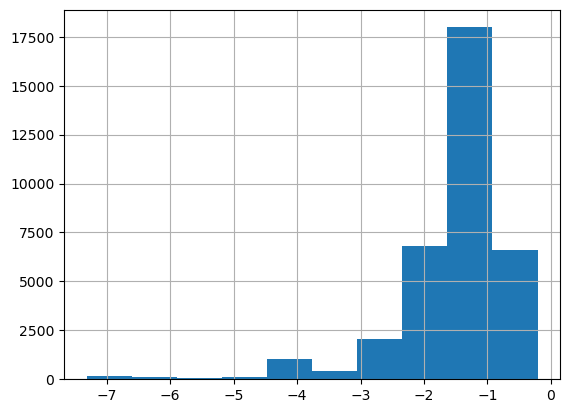

In [302]:
res['m_diff_11_end_12_beg'].hist()

In [ ]:
res.to_excel(f'.xlsx')